In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = sns.load_dataset('mpg')

In [3]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


#### data pre-processing

In [4]:
df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
name            0
dtype: int64

In [5]:
df.dropna(inplace=True)

In [6]:
df.shape

(392, 9)

In [7]:
df[['mpg','displacement','horsepower','weight','acceleration']].describe()

,mpg,displacement,horsepower,weight,acceleration
count,392.000000,392.000000,392.000000,392.000000,392.000000
mean,23.445918,194.411990,104.469388,2977.584184,15.541327
std,7.805007,104.644004,38.491160,849.402560,2.758864
min,9.000000,68.000000,46.000000,1613.000000,8.000000
25%,17.000000,105.000000,75.000000,2225.250000,13.775000
50%,22.750000,151.000000,93.500000,2803.500000,15.500000
75%,29.000000,275.750000,126.000000,3614.750000,17.025000
max,46.600000,455.000000,230.000000,5140.000000,24.800000


In [8]:
df['weight-label'] = pd.cut(x=df['weight'], bins=[1613, 2224, 2804, 3608, 5140],
                     labels=['1613-2224', '2224-2804', '2804-3608','3608-5140'])

In [9]:
df['company'] = df['name'].apply(lambda x: x.split()[0])
df['car_name'] = df['name'].apply(lambda x: ' '.join(x.split()[1:]))
df.drop('name',axis=1,inplace=True)

In [10]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,weight-label,company,car_name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,2804-3608,chevrolet,chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,3608-5140,buick,skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,2804-3608,plymouth,satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,2804-3608,amc,rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,2804-3608,ford,torino


#### ANALYSIS

##### Histograms with KDE (Kernel Density Estimator)

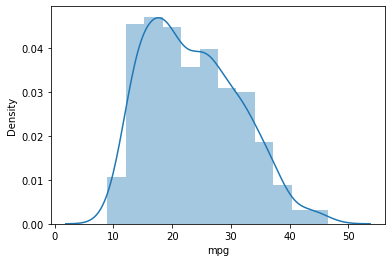

In [11]:
sns.distplot(df['mpg'])
plt.show()

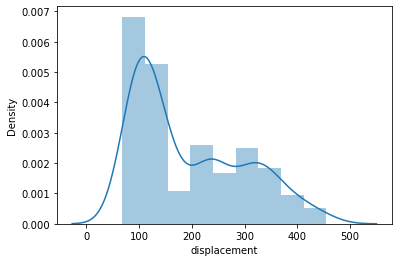

In [12]:
sns.distplot(df['displacement'])
plt.show()

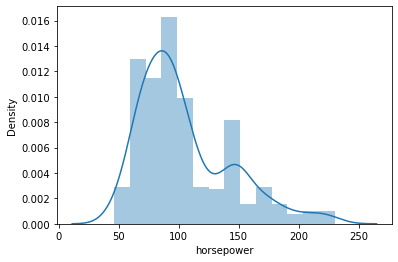

In [13]:
sns.distplot(df['horsepower'])
plt.show()

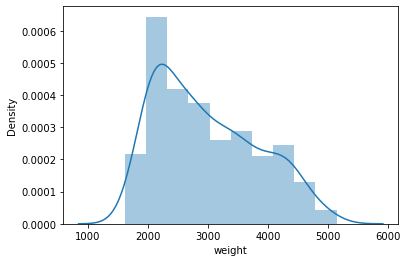

In [14]:
sns.distplot(df['weight'])
plt.show()

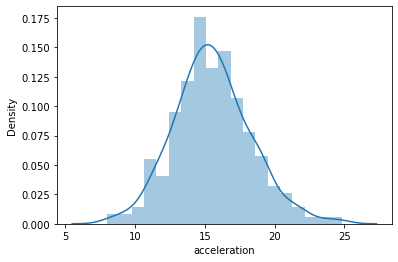

In [15]:
sns.distplot(df['acceleration'])
plt.show()

##### Boxplots

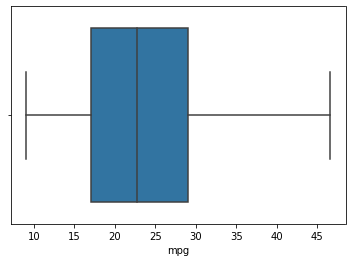

In [16]:
sns.boxplot(df['mpg'])
plt.show()

<AxesSubplot:xlabel='weight'>

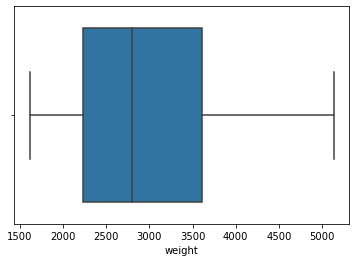

In [17]:
sns.boxplot(df['weight'])

<AxesSubplot:xlabel='horsepower'>

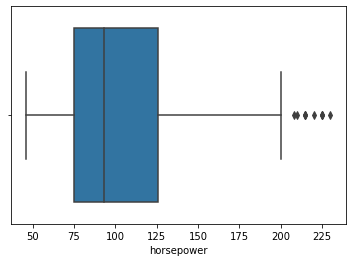

In [18]:
sns.boxplot(df['horsepower'])

<AxesSubplot:xlabel='acceleration'>

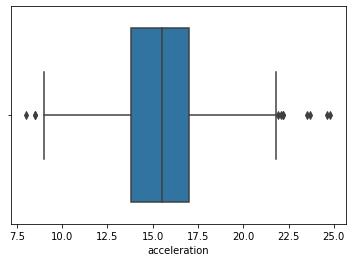

In [19]:
sns.boxplot(df['acceleration'])

<AxesSubplot:xlabel='displacement'>

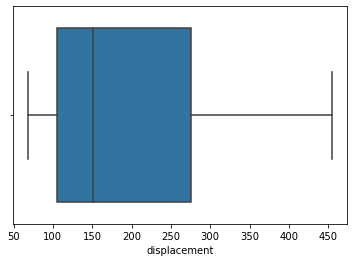

In [20]:
sns.boxplot(df['displacement'])

In [21]:
model_usa = df[df['origin']=='usa']

In [22]:
model_usa.groupby('model_year').describe()['mpg']

,count,mean,std,min,25%,50%,75%,max
model_year,,,,,,,,
70,22.0,15.272727,3.507568,9.0,14.000,15.00,17.750,22.0
71,19.0,17.736842,4.482585,12.0,14.000,18.00,19.000,28.0
72,18.0,16.277778,4.860471,11.0,13.000,14.00,19.250,28.0
73,29.0,15.034483,3.212506,11.0,13.000,14.00,18.000,23.0
74,14.0,18.142857,4.896736,13.0,14.250,16.00,19.750,28.0
75,20.0,17.550000,2.855742,13.0,15.000,17.50,19.250,23.0
76,22.0,19.431818,4.981622,13.0,15.625,18.25,23.625,29.0
77,18.0,20.722222,5.973525,15.0,16.000,18.00,25.250,33.5
78,22.0,21.772727,4.800216,17.5,19.200,20.20,22.600,36.1


<AxesSubplot:xlabel='model_year', ylabel='mpg'>

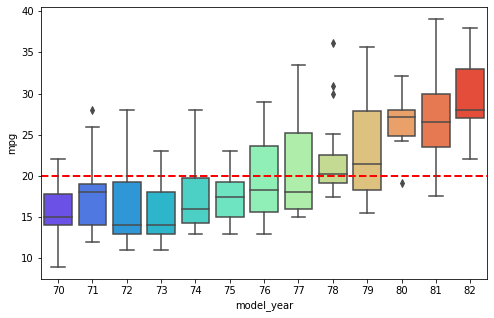

In [23]:
plt.figure(figsize=(8,5))
plt.axhline(model_usa.mpg.mean(),color='r',linestyle='dashed',linewidth=2)
sns.boxplot(x='model_year',y='mpg',data=model_usa, palette='rainbow')

<AxesSubplot:xlabel='weight-label'>

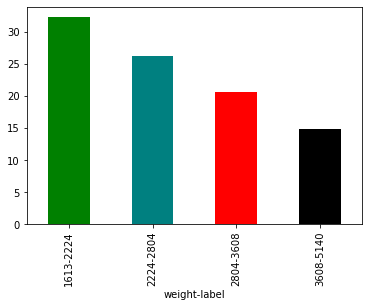

In [25]:
df.groupby(['weight-label']).mean()['mpg'].plot(kind='bar',color=['green','teal','red','black'])

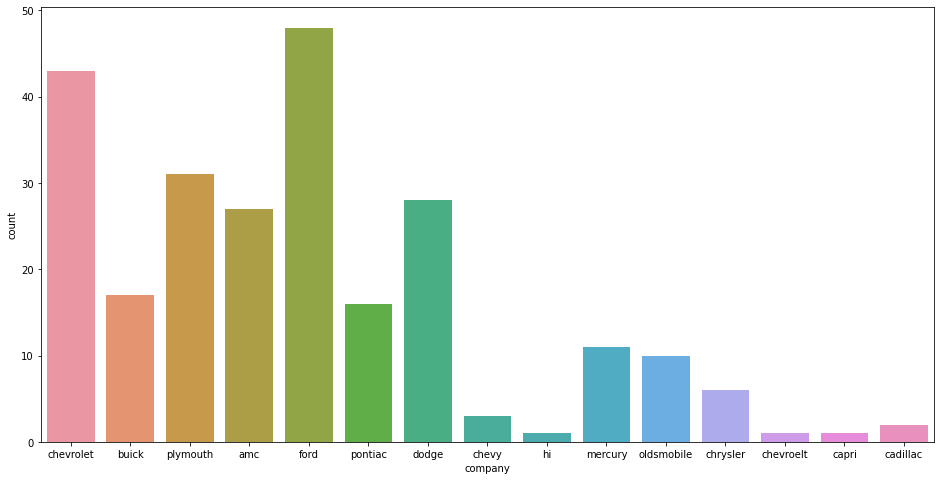

In [26]:
plt.figure(figsize=(16,8))
sns.countplot(df[df['origin']=="usa"]['company'])
plt.show()

<AxesSubplot:xlabel='company', ylabel='count'>

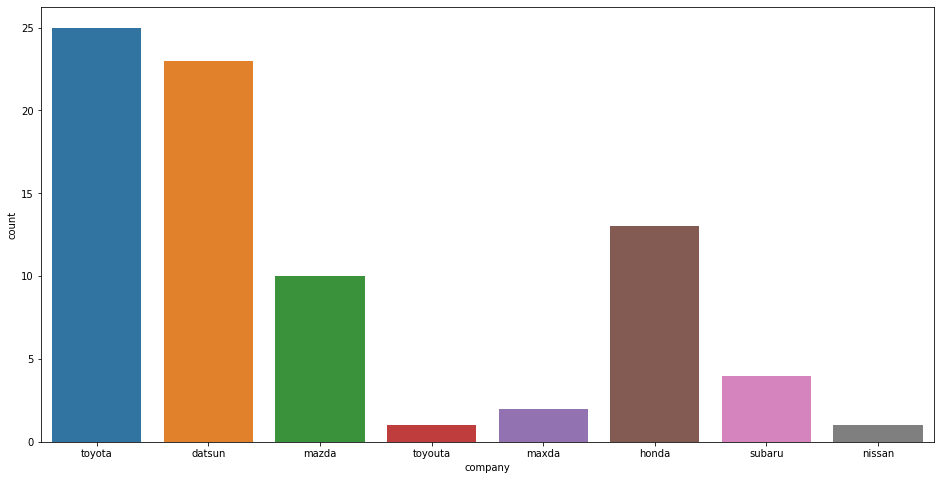

In [27]:
plt.figure(figsize=(16,8))
sns.countplot(df[df['origin']=="japan"]['company'])

<AxesSubplot:xlabel='company', ylabel='count'>

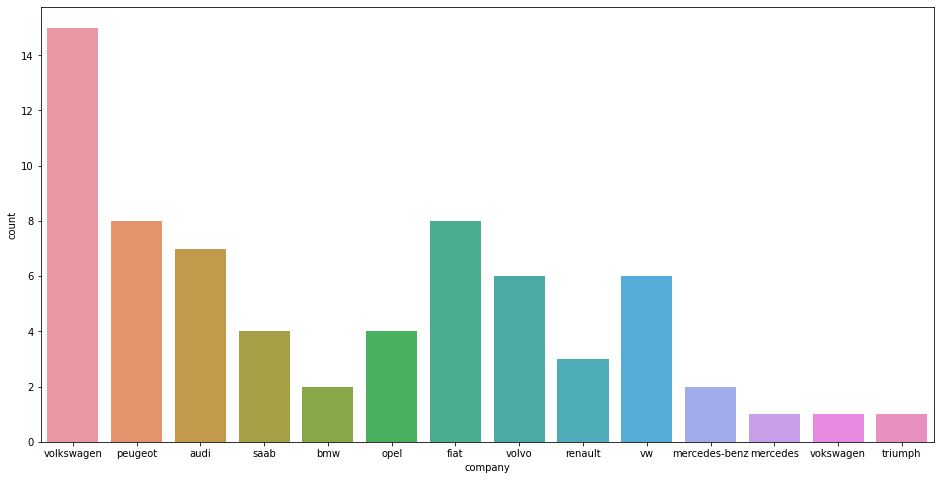

In [28]:
plt.figure(figsize=(16,8))
sns.countplot(df[df['origin']=="europe"]['company'])

In [29]:
df['mpg_level'] = df['mpg'].apply(lambda x: 'low' if x<17 else 'high' if x>29 else 'medium')

<AxesSubplot:xlabel='cylinders', ylabel='count'>

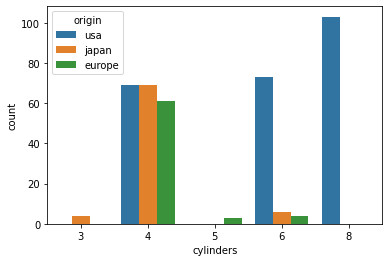

In [30]:
sns.countplot(df['cylinders'],hue=df['origin'])

<AxesSubplot:xlabel='mpg_level', ylabel='count'>

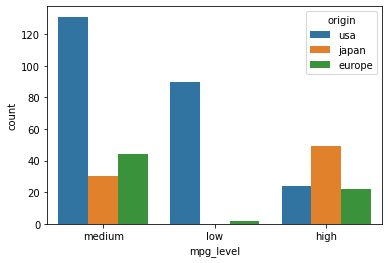

In [31]:
sns.countplot(df['mpg_level'],hue=df['origin'])

<AxesSubplot:xlabel='mpg_level', ylabel='count'>

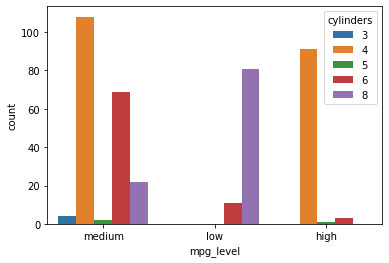

In [32]:
sns.countplot(df['mpg_level'],hue=df['cylinders'])

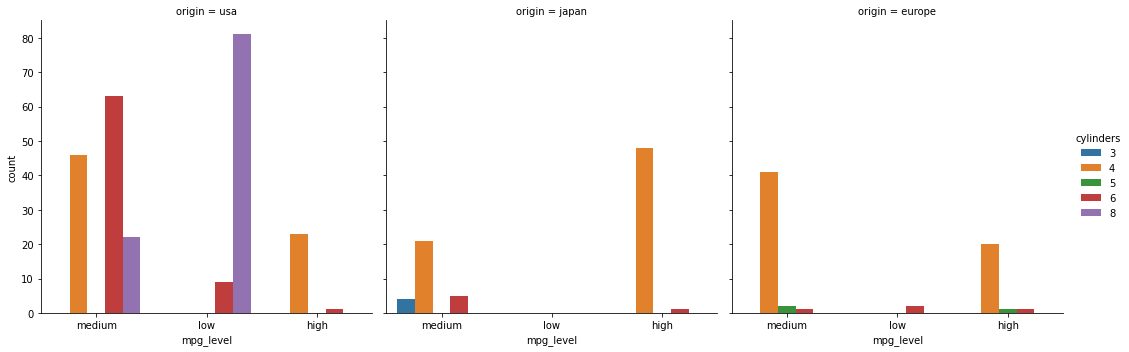

In [33]:
sns.catplot(x='mpg_level', hue='cylinders', col='origin', data=df, kind='count')
plt.show()

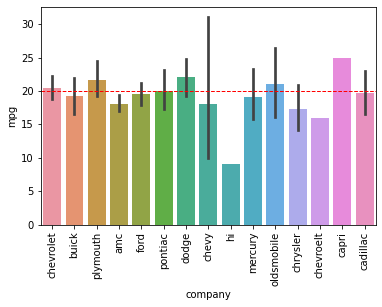

In [34]:
sns.barplot(x=df[df['origin']=='usa']['company'],y='mpg',data=df)
plt.axhline(model_usa.mpg.mean(),color='r',linestyle='dashed',linewidth=1)
plt.xticks(rotation=90)
plt.show()

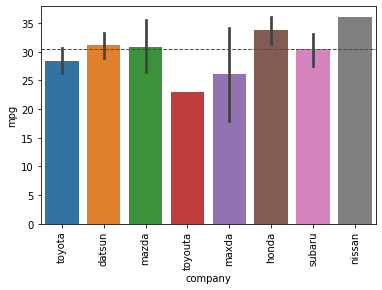

In [35]:
sns.barplot(x=df[df['origin']=='japan']['company'],y='mpg',data=df)
plt.axhline(df[df['origin']=='japan'].mpg.mean(),color='r',linestyle='dashed',linewidth=1)
plt.xticks(rotation=90)
plt.show()

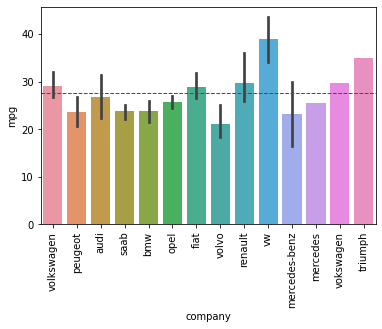

In [36]:
sns.barplot(x=df[df['origin']=='europe']['company'],y='mpg',data=df)
plt.axhline(df[df['origin']=='europe'].mpg.mean(),color='r',linestyle='dashed',linewidth=1)
plt.xticks(rotation=90)
plt.show()